# Other Clustering Benchmarks

In this notebook, we present various clustering benchmarks that played a crucial role in determining the most appropriate clustering methods for our classification tasks.


## Libraries

In [ ]:
# If you do not have stopwords
import nltk
nltk.download("stopwords")

In [1]:
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from env import DATA, preprocess

Check if the `phsihing_email_cleaned.zip` file is available in the current directory.

If not, run the `EDA.ipynb` notebook to preprocess the dataset and save it as `phishing_email_cleaned.csv`.

In [ ]:
!if [ ! -f "{DATA}/phishing_email_cleaned.zip" ]; then echo "File not found! Run EDA.ipynb preprocessing first."; exit 1; fi

## Step 0: Preprocessing

This step is partly completed in the `EDA.ipynb` notebook. We will then encode the text data in the pipeline.

In [2]:
emails = pd.read_csv(f"{DATA}/phishing_email_cleaned.zip", compression="zip")
emails = emails[emails["label"] == 1]

emails["text"] = emails["text"].astype(str)
emails["cleaned_text"] = emails["text"].apply(preprocess)

emails.drop("text", axis=1, inplace=True)

In [3]:
emails.tail(5)

,label,cleaned_text
18634,1,congratulations you have won pls contact your ...
18637,1,empty
18638,1,strong buy alert monthly newsletter topstocks ...
18645,1,date a lonely housewife always wanted to date ...
18649,1,empty


In [4]:
# Remove english stop words and useless words
useless_words = ["http", "com", "www", "spamassassin", "font", "arial", "empty", "none", "ˆì", "½ï", "ˆë"]
words_to_remove = stopwords.words("english") + useless_words

vectorizer = TfidfVectorizer(stop_words=words_to_remove, ngram_range=(1, 2), max_df=0.9, max_features=3000)

X = vectorizer.fit_transform(emails["cleaned_text"])

## Step 1: Define Helpers

In [5]:
def find_optimal_clusters(X, clustering_class, max_k=10):
    wcss = []
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    K_range = range(2, max_k + 1)

    for k in K_range:
        agg_clustering = clustering_class(n_clusters=k)
        labels = agg_clustering.fit_predict(X.toarray())

        wcss_value = 0
        for i in range(k):
            cluster_points = X[labels == i]
            cluster_center = np.mean(cluster_points, axis=0)
            wcss_value += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))
        wcss.append(wcss_value)
        
        silhouette_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X.toarray(), labels))
        db_scores.append(davies_bouldin_score(X.toarray(), labels))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, wcss, "bo-", markersize=8)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("WCSS (Inertia)")
    plt.title("Elbow Method")

    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, "ro-", markersize=8)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Analysis (Higher is better)")

    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, ch_scores, "go-", markersize=8)
    plt.title("Calinski-Harabasz Index (Higher is better)")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Score")

    plt.subplot(1, 2, 2)
    plt.plot(K_range, db_scores, "mo-", markersize=8)
    plt.title("Davies-Bouldin Index (Lower is better)")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Score")


    plt.tight_layout()
    plt.show()

## Step 2: Agglomerative Clustering

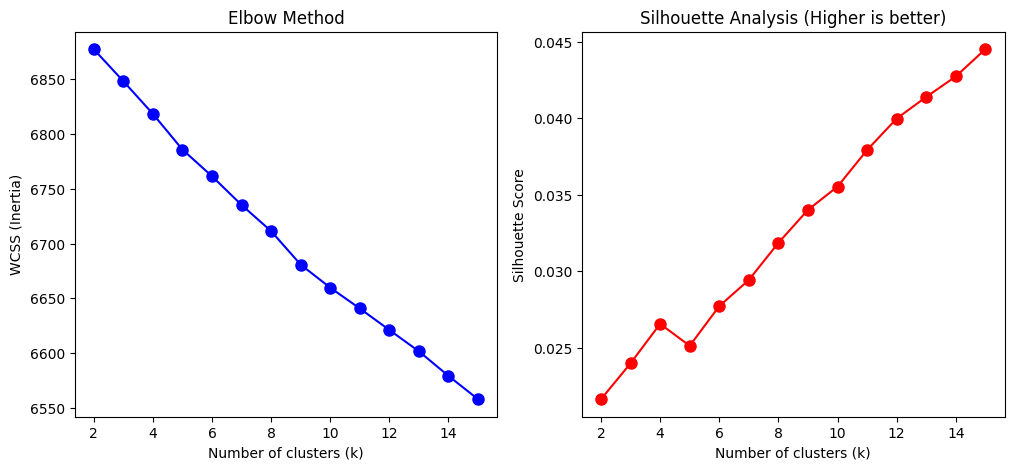

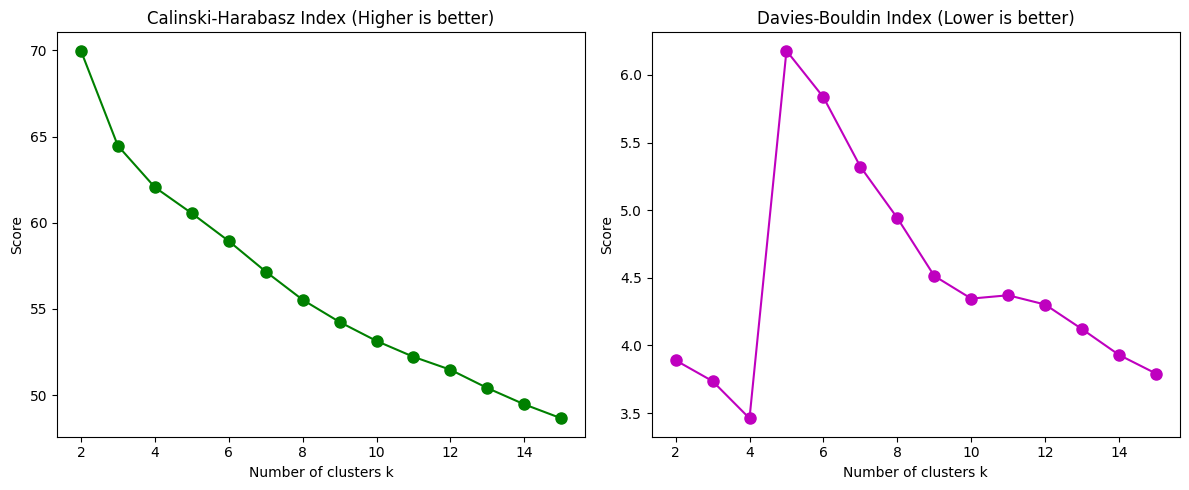

In [6]:
find_optimal_clusters(X, AgglomerativeClustering, 15)

## Step 3: Spectral Clustering

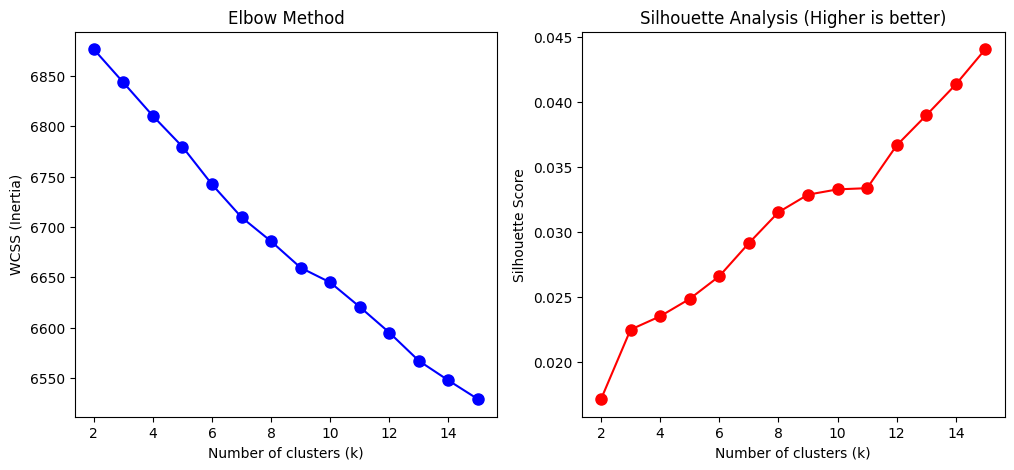

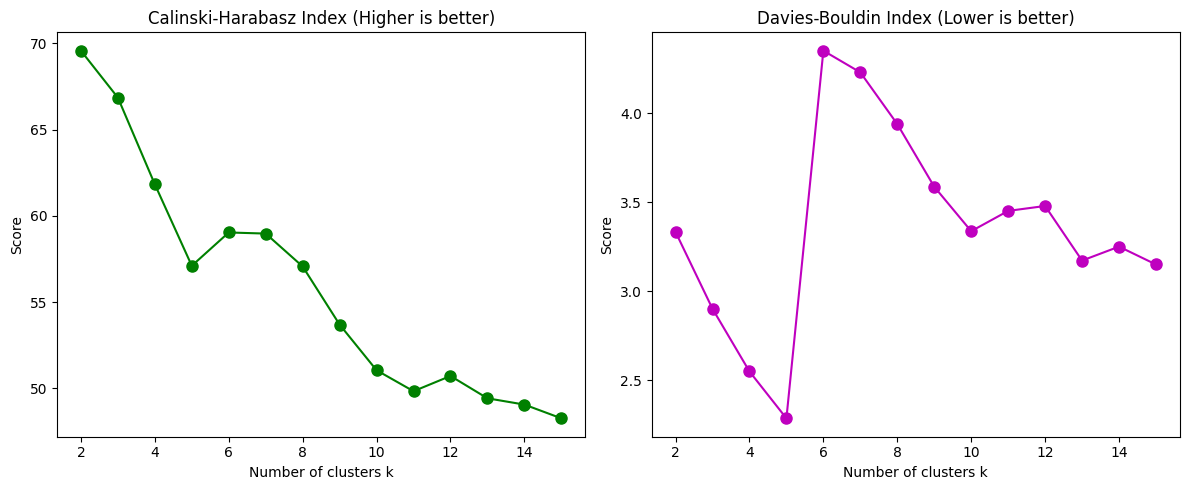

In [7]:
find_optimal_clusters(X, SpectralClustering, 15)

## Interpretation

As observed in the graphics for **SpectralClustering** and **AgglomerativeClustering** above, the graphs do not provide clear guidance on the optimal number of clusters. Specifically, the **elbow method** is ineffective, as the graph displays a consistent negative slope across the different values of clusters. Additionally, the **silhouette graph** lacks a meaningful local maximum. These two factors led us to abandon the implementation of either of these models.
